## Import Data and Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path for df
path = r"C:\Users\Artemis07\Downloads\29-08-2023 Instacart Basket Analysis"
# import dataframe 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated_2.0.pkl'))


### Creating Bar Charts

<Axes: xlabel='order_dow'>

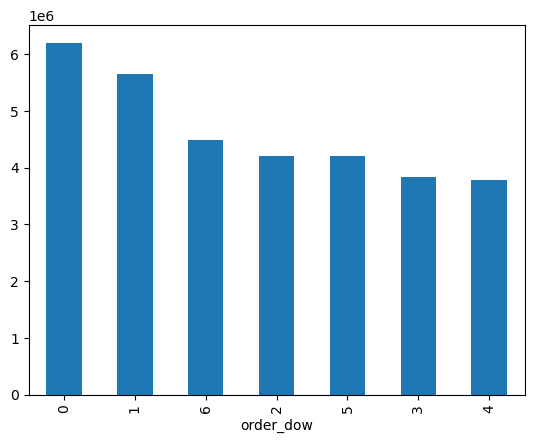

In [3]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

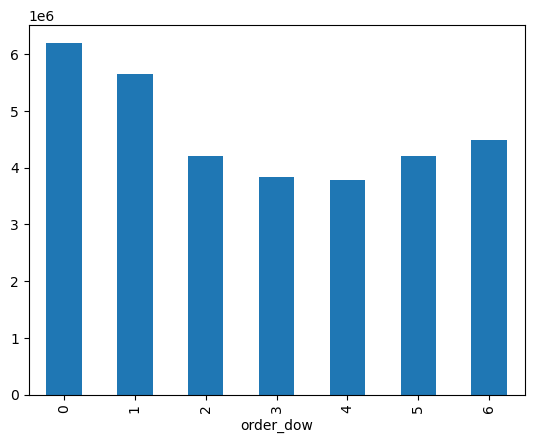

In [4]:
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [5]:
#checking the frequencies
ords_prods_merge['order_dow'].value_counts()

order_dow
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [6]:
# reorganizing the frequencies with sort_index
ords_prods_merge['order_dow'].value_counts().sort_index()

order_dow
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

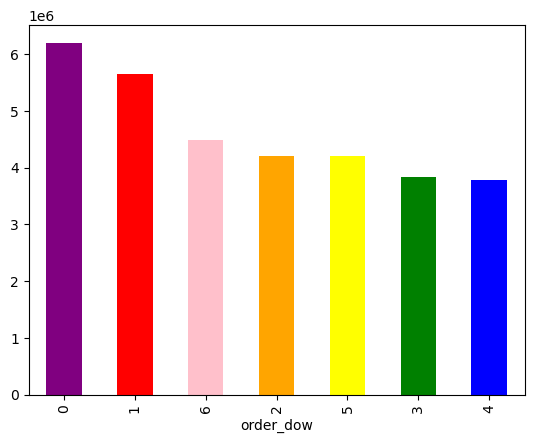

In [7]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_dow.png'))

### Creating Histograms and Scatterplorts

<Axes: ylabel='Frequency'>

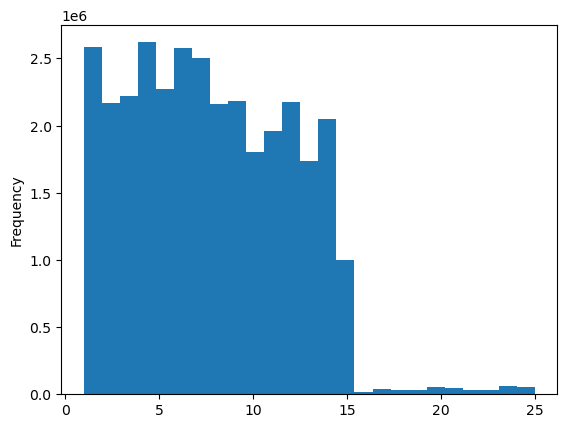

In [9]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
ords_prods_merge['prices'].mean()

7.79018025753485

In [11]:
ords_prods_merge['prices'].median()

7.4

In [12]:
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

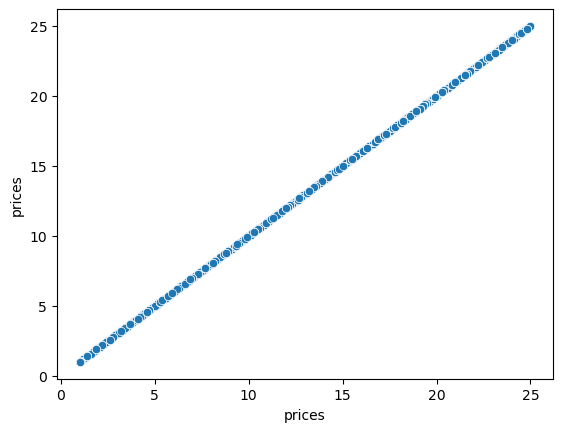

In [13]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [14]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag


In [15]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [16]:
ords_prods_merge['prices'].max()

25.0

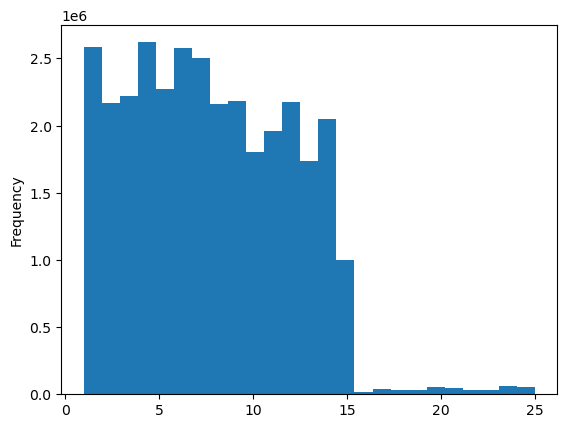

In [17]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

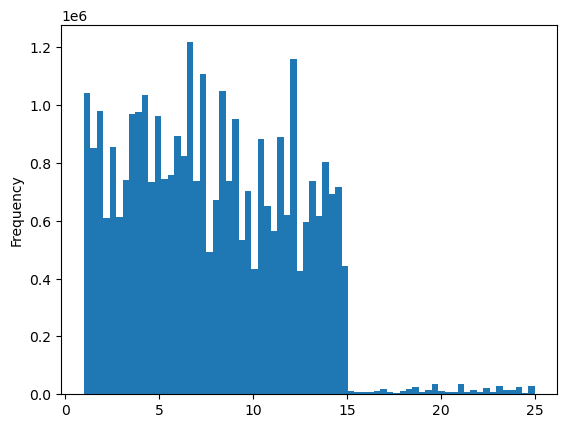

In [18]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [19]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar'))

### Sampling Data

In [20]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [23]:
# Store 70%  of the sample in the dataframe bi

big = ords_prods_merge[dev]

In [24]:
# Store 30% of the sample in the data

small = ords_prods_merge[~dev]

In [25]:
len(ords_prods_merge)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
df_2 = small [['order_dow', 'prices']]

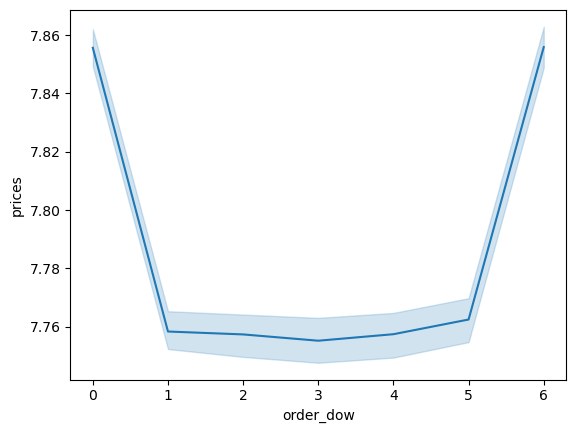

In [28]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

In [29]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line'))